In [289]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pickle
%matplotlib inline

In [290]:
test_images = glob.glob("../test_images/*.jpg")
test_images

['../test_images\\straight_lines1.jpg',
 '../test_images\\straight_lines2.jpg',
 '../test_images\\test1.jpg',
 '../test_images\\test2.jpg',
 '../test_images\\test3.jpg',
 '../test_images\\test4.jpg',
 '../test_images\\test5.jpg',
 '../test_images\\test6.jpg']

In [291]:
a_file = open("cal_info.pkl", "rb")
cal_info = pickle.load(a_file)
a_file.close()

In [292]:
mtx = cal_info["mtx"]
dist = cal_info["dist"]

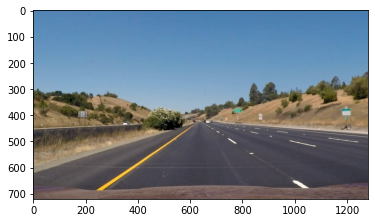

In [293]:
img = plt.imread(test_images[0])
plt.imshow(img)

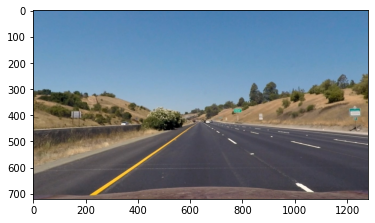

In [294]:
img_undist = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(img_undist)

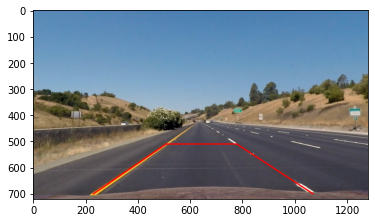

In [307]:
# Defining the points and plotting on the undistorted image
points = np.float32([  [230,700]
                     , [508,510]
                     , [778,510]
                     , [1070,700]])
plt.imshow(img_undist)
for i, point in enumerate(points):
    if i != len(points)-1:
        cv2.line(img_undist, (points[i][0], points[i][1]), (points[i+1][0], points[i+1][1]), [255,0,0], 3)

In [308]:
# Defining the destination points
offsetx = 400
offsety = 600
img_size = (img.shape[1], img.shape[0])
dst_points = np.float32([[offsetx, img_size[1]]
                      , [offsetx, offsety]
                      , [img_size[0]-offsetx, offsety]
                      , [img_size[0]-offsetx, img_size[1]]])

In [309]:
# Calculating the perspective transform matrix and its inverse
M = cv2.getPerspectiveTransform(points, dst_points)
Minv = cv2.getPerspectiveTransform(dst_points, points)

In [310]:
M

array([[-3.80952381e-01, -1.50977444e+00,  8.77794486e+02],
       [ 1.69999010e-15, -1.84962406e+00,  8.14736842e+02],
       [ 2.72820973e-18, -2.38095238e-03,  1.00000000e+00]])

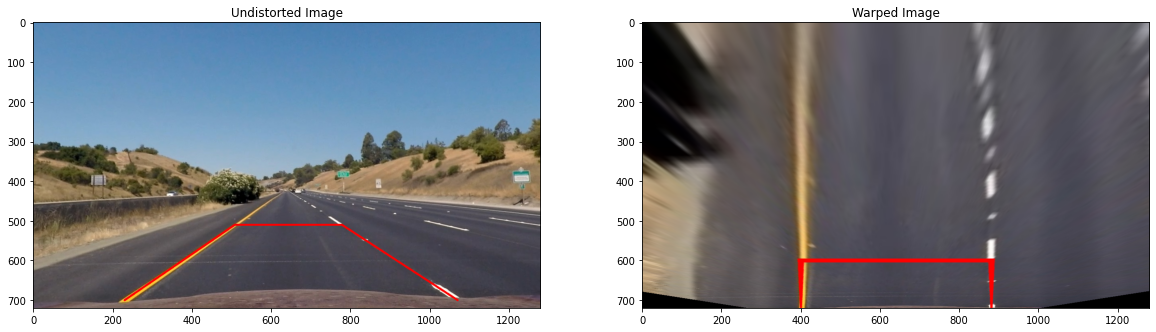

In [318]:
warped = cv2.warpPerspective(img_undist, M, img_size, flags=cv2.INTER_LINEAR)
f, (ax1, ax2) = plt.subplots(1,2, figsize=[20,10])
ax1.set_title("Undistorted Image")
ax1.imshow(img_undist)
ax2.set_title("Warped Image")
ax2.imshow(warped)

In [271]:
perspective_info = {}
perspective_info["M"] = M
perspective_info["Minv"] = Minv

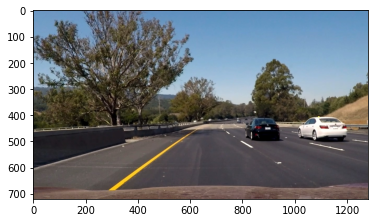

In [286]:
test_img = plt.imread(test_images[7])
test_img_undist = cv2.undistort(test_img, mtx, dist, None, mtx)
test_img_warped = cv2.warpPerspective(test_img_undist, M, img_size, flags=cv2.INTER_LINEAR)
plt.imshow(test_img)
                

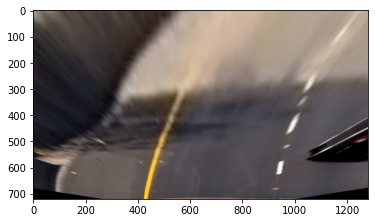

In [287]:
plt.imshow(test_img_warped)

In [288]:
f_file = open("perspective_info", "wb")
pickle.dump(perspective_info, f_file)
f_file.close()